In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import base64
import requests
import json

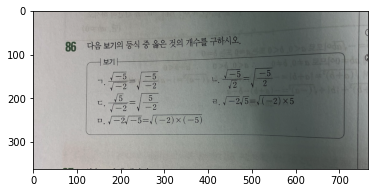

In [2]:
img = cv2.imread('images/shadow.png')
img2 = cv2.imread('images/shadow.png')
plt.imshow(img)
plt.show()

In [3]:
rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []

In [4]:
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

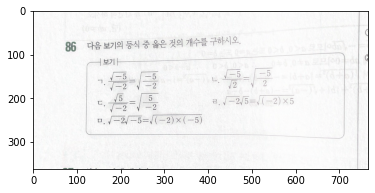

In [5]:
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
plt.imshow(result)
plt.show()

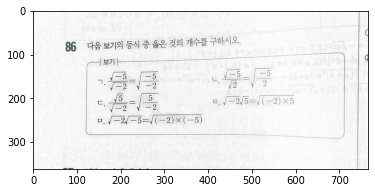

In [6]:
plt.imshow(result_norm)
plt.show()

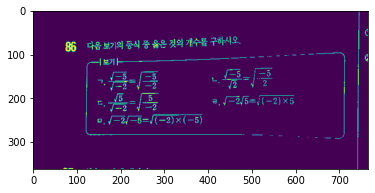

In [7]:
gray = cv2.cvtColor(result_norm, cv2.COLOR_BGR2GRAY)
gray = cv2.inRange(gray, 0, 190)
plt.imshow(gray)
plt.show()